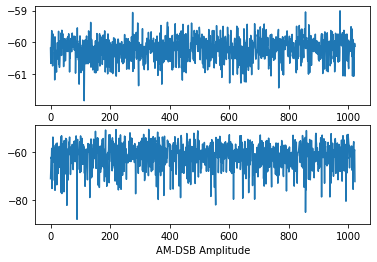

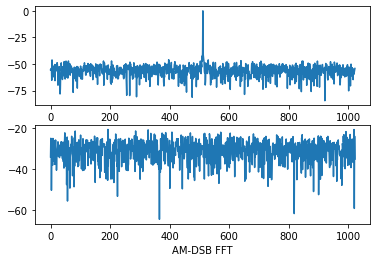

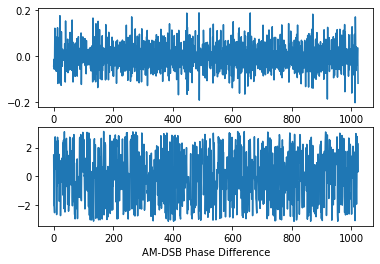

In [2]:
from plot_data import *

# initialize dataset location
folTest = os.getcwd() + '/../gnuradio_sim/'
fileTest = 'SIGNN_2019_01_1024.hdf5'

# modulations
mod1 = 'WBFM'
mod2 = 'AM-DSB'
snr = 10

# extract datasets
wbfmSet = parse_dataset(mod1, snr, folTest, fileTest)
amdsbSet = parse_dataset(mod2, snr, folTest, fileTest)

# extract example vectors for analysis
wbfmSig = wbfmSet[np.random.randint(wbfmSet.shape[0]), :]
amdsbSig = amdsbSet[np.random.randint(amdsbSet.shape[0]), :]

# print plots
print_plots(wbfmSig, mod1, amdsbSig, mod2)